In [1]:
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')

2024-04-21 08:43:15.033307: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 08:43:15.033442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 08:43:15.210067: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop('RowNumber',axis='columns',inplace=True)

In [4]:
df.drop('CustomerId',axis='columns',inplace=True)

In [5]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.Exited.values

array([1, 0, 1, ..., 1, 1, 0])

In [7]:
df.shape

(10000, 12)

In [8]:
df1 = df[df.Geography!=' ']
df1.shape

(10000, 12)

In [9]:
df.drop('Surname',axis='columns',inplace=True)

In [10]:
df.Exited.map(dict(yes=1, no=0))

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: Exited, Length: 10000, dtype: float64

In [11]:
df.Exited


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
df.rename({"Exited":"Churn"},axis='columns',inplace=True)

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn                int64
dtype: object

In [14]:
df.Churn.replace(to_replace=[0, 1], value=['no', 'yes'])
df.Churn.head


<bound method NDFrame.head of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64>

In [15]:
df.Churn

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Churn, Length: 10000, dtype: int64

In [16]:
df[df.Churn=='no']

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn


In [17]:
df['Churn'] = df['Churn'].apply(lambda x: 'yes' if x == 1 else 'no')

In [18]:
df.Churn

0       yes
1        no
2       yes
3        no
4        no
       ... 
9995     no
9996     no
9997    yes
9998    yes
9999     no
Name: Churn, Length: 10000, dtype: object

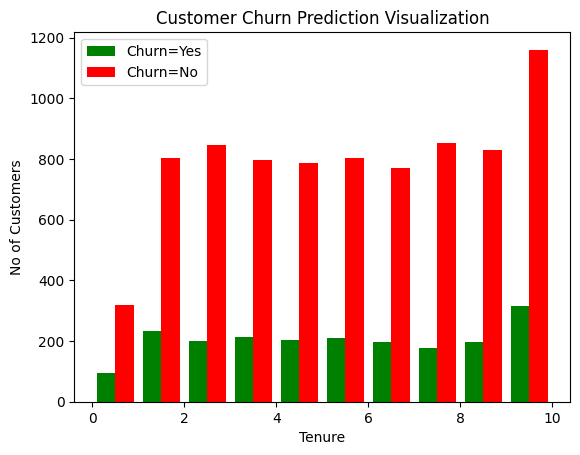

In [19]:
tenure_churn_no = df[df.Churn=='no'].Tenure
tenure_churn_yes = df[df.Churn=='yes'].Tenure

plt.xlabel("Tenure")
plt.ylabel("No of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Churn: ['yes' 'no']


In [22]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Churn               object
dtype: object

In [23]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [24]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [25]:
df.Balance

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [26]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipykernel_18/2750846270.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipykernel_18/2750846270.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
df.Gender.unique()

array([1, 0])

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [30]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_France,Geography_Germany,Geography_Spain
1275,719,0,32,9,146605.27,1,1,1,77119.45,0,True,False,False
9175,519,1,38,7,125328.56,1,1,0,188225.67,0,True,False,False
2157,744,1,44,3,0.00,2,1,1,189016.14,0,True,False,False
6640,681,0,36,5,141952.07,1,1,1,185144.08,0,True,False,False
4200,529,1,43,5,0.00,2,0,0,79476.63,0,False,False,True


In [31]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Churn                  int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [32]:
cols_to_scale = ['Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [33]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [34]:
cols_to_scale = ['CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [35]:
X = df1.drop('Churn',axis='columns')
y = df1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(8000, 12)

In [37]:
X_test.shape

(2000, 12)

In [38]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,39,0.6,0.000000,2,0,0,0.096273,False,False,True
4154,0.752,0,34,0.3,0.000000,2,1,0,0.981478,True,False,False
3881,0.476,1,64,0.3,0.000000,1,1,1,0.948551,True,False,False
9238,0.846,1,50,0.4,0.000000,2,1,0,0.646869,True,False,False
5210,0.402,0,35,0.7,0.517012,2,0,0,0.434670,True,False,False
7487,0.602,1,56,0.4,0.000000,1,0,0,0.421898,True,False,False
7542,0.314,1,34,0.4,0.000000,2,1,1,0.303413,False,False,True
7524,0.620,1,40,0.8,0.666330,1,1,1,0.925815,True,False,False
9412,0.750,0,26,0.6,0.393324,1,0,0,0.668609,True,False,False
6377,0.684,0,33,0.9,0.000000,1,1,0,0.567526,True,False,False


In [39]:
len(X_train.columns)

12

In [40]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5976 - loss: 1.5896
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.5128
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7967 - loss: 0.4892
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8013 - loss: 0.4603
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.4460
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8240 - loss: 0.4254
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8133 - loss: 0.4349
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8131 - loss: 0.4324
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8166 - loss: 0.4336
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.4372
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7980 - loss: 0.4599
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [41]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.4242


[0.42378556728363037, 0.8159999847412109]

In [42]:
yp = model.predict(X_test)
yp[:5]


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.1296048 ],
       [0.10451034],
       [0.09415112],
       [0.0795321 ],
       [0.15954639]], dtype=float32)

In [43]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Churn, dtype: int64

In [44]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [45]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1595
           1       0.61      0.26      0.36       405

    accuracy                           0.82      2000
   macro avg       0.72      0.61      0.63      2000
weighted avg       0.79      0.82      0.78      2000



Text(95.72222222222221, 0.5, 'Truth')

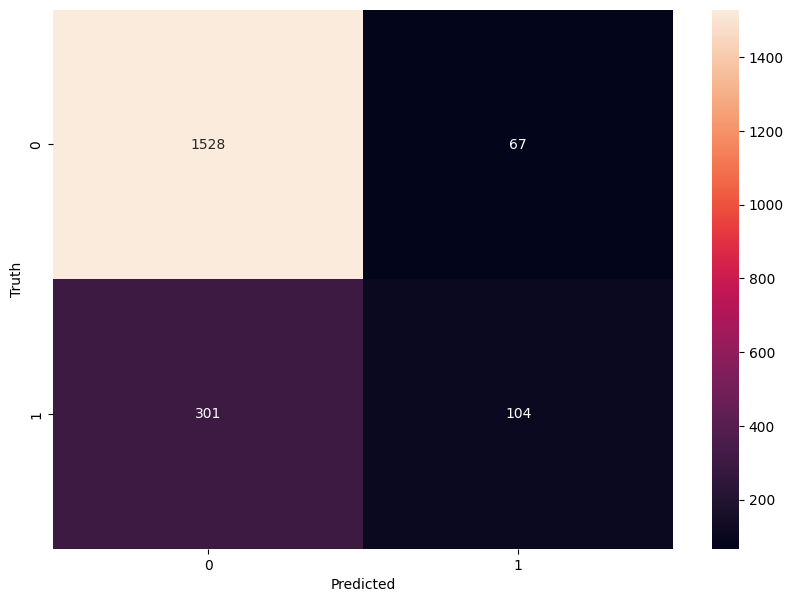

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
y_test.shape

(2000,)

In [49]:
round((1544+160)/(1544+160+345+51),2)

0.81

In [50]:
round(1544/(1544+245),2)


0.86

In [51]:
round(160/(160+51),2)

0.76